# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2  

# Import your own code
import inauguralproject

# Question 1

**Explain how you solve the model**

The following steps explains our code in generel 
1. first we setup the class 
2. then we define the population and range for x 
3. then we use the endowments defined in the .py file
4. then we use a if loop to find the utility for the two consumers
5. and lastly setting up the edgeworth box
- The edgeworth-box shows the pareto improvements for the two consumers, relative to there endowments.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


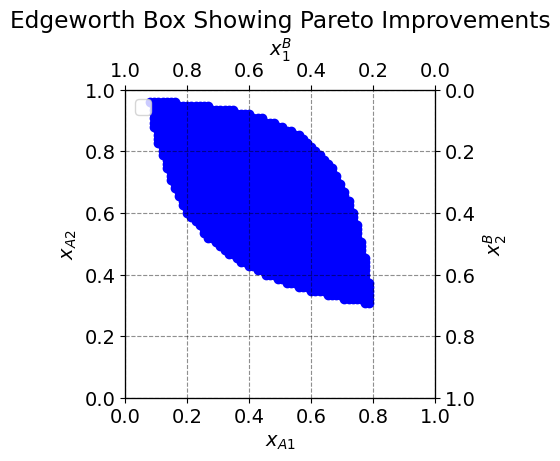

In [3]:
# code for solving the model (remember documentation and comments)
from inauguralproject import ExchangeEconomyClass

model=ExchangeEconomyClass()

# Initialize the model
model = ExchangeEconomyClass()

# Define the range of combinations
N = 75
x_range = np.linspace(0, 1, N + 1)

# Initialize lists to store valid combinations
valid_xA1 = []
valid_xA2 = []

# Calculate utility at the endowment point
u_A_endowment = model.utility_A(model.par.w1A, model.par.w2A)
u_B_endowment = model.utility_B(model.par.w1B, model.par.w2B)

# Iterate over all combinations
for xA1 in x_range:
    for xA2 in x_range:
        # Calculate utility for player A and B
        u_A = model.utility_A(xA1, xA2)
        u_B = model.utility_B(1 - xA1, 1 - xA2)  # xB1 = 1 - xA1, xB2 = 1 - xA2
        
        # Check if the combination satisfies Pareto improvement
        if u_A >= u_A_endowment and u_B >= u_B_endowment:
            valid_xA1.append(xA1)
            valid_xA2.append(xA2)

plt.figure(figsize=(4, 4))

# Scatter plot for Pareto improvements for A
plt.scatter(valid_xA1, valid_xA2, color='blue', label='Pareto Improvements for A')

# Setting primary axis labels for A's allocations
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

# Setting the limits for the primary axes from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# Creating secondary axes for B's allocations
ax2 = plt.twiny()  # Create a second x-axis sharing the same y-axis
ax3 = plt.twinx()  # Create a second y-axis sharing the same x-axis

# Setting the limits for the secondary axes from 0 to 1
ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# Setting labels for B's allocations, which are complements to A's allocations
ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')

# Inverting the direction of the secondary axes to reflect B's perspective
ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()

plt.title('Edgeworth Box Showing Pareto Improvements')
plt.grid(True)
plt.legend(loc='upper left')

plt.show()

# Question 2

Explain your code and procedure
- In this section we find the error in the market clearing conditions for p = {0,5...2,5}

Explaning the code
1. we again define the population and the scale for p1
2. then we store the errors
3. we then calculate the demand quataties and the errors for the two prices
4. lastly we plot the errors in our graph - In this section we find the error in the market clearing conditions for p = {0,5...2,5}

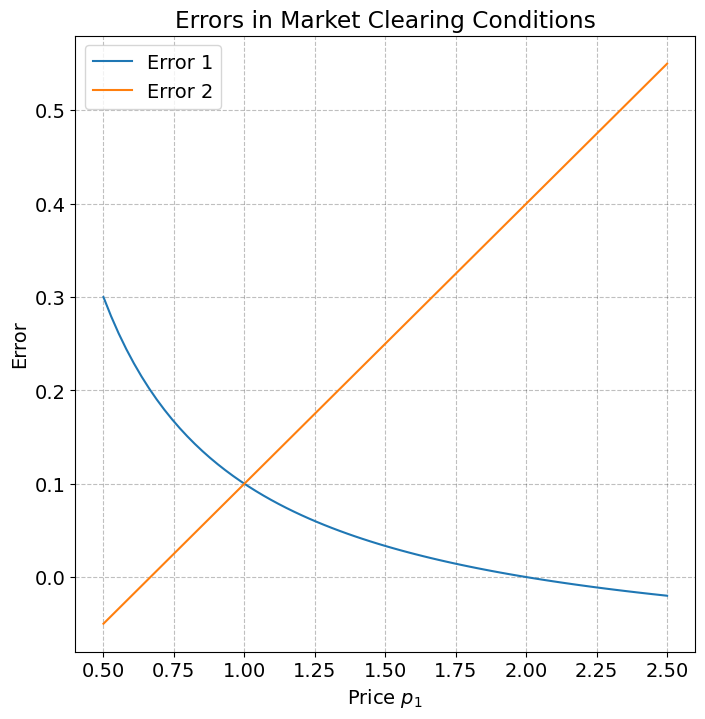

In [4]:
# Initialize the model
model = ExchangeEconomyClass()

# Define the set of prices P1
N = 75
P1 = np.linspace(0.5, 2.5, N)

# Initialize lists to store errors
errors_1 = []
errors_2 = []

# Iterate over each price in P1
for p1 in P1:
    # Calculate demand quantities for both players
    x1A, x2A = model.demand_A(p1)
    x1B, x2B = model.demand_B(p1)
    
    # Calculate errors
    error_1 = x1A - model.par.w1A + x1B - (1 - model.par.w1A)
    error_2 = x2A - model.par.w2A + x2B - (1 - model.par.w2A)
    
    # Append errors to the list
    errors_1.append(error_1)
    errors_2.append(error_2)

# Plot the errors
plt.figure(figsize=(8, 8))
plt.plot(P1, errors_1, label='Error 1')
plt.plot(P1, errors_2, label='Error 2')
plt.xlabel('Price $p_1$')
plt.ylabel('Error')
plt.title('Errors in Market Clearing Conditions')
plt.grid(True)
plt.legend()
plt.show()

# Question 3

Explain your code and procedure

# Interpretation
- the market price are found to be 0,944 - witch match the results found in Q2. 

ADD CONCISE CONLUSION.

In [9]:
# Define the range of prices to search for market clearing price
price_range = np.linspace(0.5, 2.5, 1000)

# Initialize variables to store market clearing price and errors
market_clearing_price = None
min_error = float('inf')

# Iterate over each price in the range
for p1 in price_range:
    # Calculate demand quantities for both players
    x1A, x2A = model.demand_A(p1)
    x1B, x2B = model.demand_B(p1)
    
    # Calculate errors
    error_1 = x1A - model.par.w1A + x1B - (1 - model.par.w1A)
    error_2 = x2A - model.par.w2A + x2B - (1 - model.par.w2A)
    
    # Compute the squared sum of errors as a measure of distance from zero
    total_error = error_1 ** 2 + error_2 ** 2
    
    # Check if the total error is smaller than the minimum error found so far
    if total_error < min_error:
        min_error = total_error
        market_clearing_price = p1

print("Market clearence price:", market_clearing_price)

Market clearence price: 0.9444444444444444


# Question 4

4.1

In [11]:
from inauguralproject import ExchangeEconomyClass

# Initialize the model
model = ExchangeEconomyClass()

# Define the set of prices P1
N = 75
P1 = np.linspace(0.5, 2.5, N + 1)

# Initializes variables to store the optimal price and allocation
optimal_price = None
optimal_allocation = None
max_utility = float('-inf')

# We now iterate over each price in P1
for p1 in P1:
    # Calculating the demand quantities for player B
    x1B, x2B = model.demand_B(p1)
    
    # Calculating utility for player A
    utility_A = model.utility_A(1 - x1B, 1 - x2B)
    
    # Check if utility is maximized
    if utility_A > max_utility:
        max_utility = utility_A
        optimal_price = p1
        optimal_allocation = (1 - x1B, 1 - x2B)

print(f"The optimal price chosen by player A: {optimal_price:.4f}")
print(f"The optimal allocation for player A: {optimal_allocation}")


The optimal price chosen by player A: 1.3533
The optimal allocation for player A: (0.31888341543513954, 0.598)


4.2

In [12]:
# Initialize the model
model = ExchangeEconomyClass()

# Define the objective function to maximize A's utility
def objective_function(p1):
    # Calculate demand quantities for player B
    x1B, x2B = model.demand_B(p1)
    
    # Calculate A's utility
    utility_A = model.utility_A(1 - x1B, 1 - x2B)
    
    return -utility_A  # We minimize the negative utility to maximize the utility

# Initial guess for the price
initial_guess = 1.0

# Define constraints (price should be greater than 0)
constraints = [{'type': 'ineq', 'fun': lambda p1: p1}]

# Optimize the objective function
result = minimize(objective_function, initial_guess, constraints=constraints)

# Extract the optimal price
optimal_price = result.x[0]

# Calculate the optimal allocation for player A
x1B_optimal, x2B_optimal = model.demand_B(optimal_price)
x1A_optimal = 1 - x1B_optimal
x2A_optimal = 1 - x2B_optimal

# Print the results
print("Optimal Price (p1):", optimal_price)
print("Optimal Allocation for Player A:")
print("x1A:", x1A_optimal)
print("x2A:", x2A_optimal)


Optimal Price (p1): 1.3649136379774853
Optimal Allocation for Player A:
x1A: 0.32013724939426114
x2A: 0.5968419695355848


# Interpretation
By comparing the two results we get that the price is almost the same, but slightly higher in question b, while the optimal allocation of good 1 is higher in 4.2, and for good 2 it is higher in 4.1.

# Question 5
a)

In [16]:
# We start by checking the initiaql utiliy for both players
initial_utility1 = model.utility_A(model.par.w1A, model.par.w2A)
initial_utility2 = model.utility_B(model.par.w1B, model.par.w2B)

print(f"Initial utility for player A: {initial_utility1:.4f}")
print(f"Initial utility for player B: {initial_utility2:.4f}")

Initial utility for player A: 0.4160
Initial utility for player B: 0.3037


In [21]:
# code for solving the model (remember documentation and comments)
from inauguralproject import ExchangeEconomyClass

model=ExchangeEconomyClass()

# Initialize the model
model = ExchangeEconomyClass()

# Define the range of combinations
N = 75
x_range = np.linspace(0, 1, N + 1)

# Initialize lists to store valid combinations
valid_xA1 = []
valid_xA2 = []

# Calculate utility at the endowment point
u_A_endowment = model.utility_A(model.par.w1A, model.par.w2A)
u_B_endowment = model.utility_B(model.par.w1B, model.par.w2B)

# Iterate over all combinations
for xA1 in x_range:
    for xA2 in x_range:
        # Calculate utility for player A and B
        u_A = model.utility_A(xA1, xA2)
        u_B = model.utility_B(1 - xA1, 1 - xA2)  # xB1 = 1 - xA1, xB2 = 1 - xA2
        
        # Check if the combination satisfies Pareto improvement
        if u_A >= u_A_endowment and u_B >= u_B_endowment:
            valid_xA1.append(xA1)
            valid_xA2.append(xA2)

highest_u_A = float('-inf')
optmial_xA1 = None
optmial_xA2 = None

for xA1, xA2 in zip(valid_xA1, valid_xA2):
    u_A = model.utility_A(xA1, xA2)
    if u_A > highest_u_A:
        highest_u_A = u_A
        optmial_xA1 = xA1
        optmial_xA2 = xA2
#Printing results
print(f"The utility for player A at the optimal allocation: {highest_u_A:.4f}")
print(f"The optimal allocation for player A: x1A = {optmial_xA1:.4f}, x2A = {optmial_xA2:.4f}")



The utility for player A at the optimal allocation: 0.7416
The optimal allocation for player A: x1A = 0.5600, x2A = 0.8533


# Interpretation
Above is Agent A's optimal allocation of each good, given that Agent B is not worse off, than in his intial endownment. 
We loop through the paretooptimal allocations found in question 1, and select the one where Agent A recives the highest utility. We know that since it is a pareto-optimal solution, Agent B utility will no be lower than in the intial endowment case.  
b)

In [22]:
# Initialize the model
model = ExchangeEconomyClass()

# Define the objective function to maximize A's utility
def objective_function(x):
    x1A, x2A = x
    
    # Calculate B's consumption corresponding to A's choice
    x1B = 1 - x1A
    x2B = 1 - x2A
    
    # Calculate A's utility
    utility_A = model.utility_A(x1A, x2A)
    
    return -utility_A  # We minimize the negative utility to maximize the utility

# Define the constraint function to ensure B is not worse off
def constraint_function(x):
    x1A, x2A = x
    
    # Calculate B's consumption corresponding to A's choice
    x1B = 1 - x1A
    x2B = 1 - x2A
    
    # Calculate B's utility
    utility_B = model.utility_B(x1B, x2B)
    
    # Calculate B's utility at the initial endowment
    utility_B_endowment = model.utility_B(model.par.w1B, model.par.w2B)
    
    return utility_B - utility_B_endowment  # Constraint: B should not be worse off

# Define initial guess for the allocation
initial_guess = [0.5, 0.5]  # Start from the midpoint of the consumption space

# Define bounds for the consumption space [0, 1] x [0, 1]
bounds = [(0, 1), (0, 1)]

# Optimize the objective function subject to the constraints
result = minimize(objective_function, initial_guess, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint_function})

# Extract the optimal allocation for player A
x1A_optimal, x2A_optimal = result.x

# Calculate the corresponding consumption for player B
x1B_optimal = 1 - x1A_optimal
x2B_optimal = 1 - x2A_optimal

# Print the results
print("Optimal Allocation for Player A:")
print("x1A:", x1A_optimal)
print("x2A:", x2A_optimal)
print("Corresponding Consumption for Player B:")
print("x1B:", x1B_optimal)
print("x2B:", x2B_optimal)

Optimal Allocation for Player A:
x1A: 0.6808707633768915
x2A: 0.7250682828135989
Corresponding Consumption for Player B:
x1B: 0.31912923662310855
x2B: 0.2749317171864011


# interpretation 
We've found the optimal allokation when we change the bound from C, to x1_A and x2_A being ind the bound from [0, 1] 

# Question 6

a) We draw upon the work in 5b, however now we also maximize the aggregate utility, in order to solve a benevolent social planner.

In [24]:
from scipy.optimize import minimize
# Define the objective function to maximize A's utility
def objective_function(x):
    x1A, x2A = x
    
    # Calculate B's consumption corresponding to A's choice
    x1B = 1 - x1A
    x2B = 1 - x2A 
    # Calculate A & B 's utility
    utility_A = model.utility_A(x1A, x2A)
    utility_B = model.utility_B(x1B, x2B)
    aggregate_utility = utility_A + utility_B
    return -aggregate_utility

initial_guess = [0.5, 0.5]  # Start from the midpoint of the consumption space
bounds = [(0, 1), (0, 1)]  # Define bounds for the consumption space [0, 1] x [0, 1]

# Optimize the objective function subject to the constraints
result = minimize(objective_function, initial_guess, bounds=bounds, constraints={'type': 'ineq', 'fun': constraint_function})
x1A_optimal, x2A_optimal = result.x

# Calculate the corresponding consumption for player B
x1B_optimal = 1 - x1A_optimal
x2B_optimal = 1 - x2A_optimal

# Print the results
print("Optimal Allocation for Player A:")
print("x1A:", x1A_optimal)
print("x2A:", x2A_optimal)
print("Corresponding Consumption for Player B:")
print("x1B:", x1B_optimal)
print("x2B:", x2B_optimal)



Optimal Allocation for Player A:
x1A: 0.33341166147388446
x2A: 0.6665883190561481
Corresponding Consumption for Player B:
x1B: 0.6665883385261155
x2B: 0.3334116809438519


# Interpretation
We see that when we solve as a social planner we see that the Agents consume the opposite amount of each good. The is due to the symmetry in optimal consumption fucntions and furthermore they assumed wieghts placed on each good, that is the values of allpha= 1/3 and beta = 2/3
Compared to previous results where A is Market maker, we simply find the allocation that is best for A, not making B worse off. 
b)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


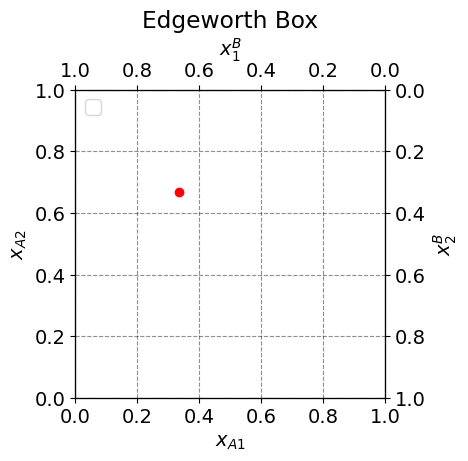

In [32]:
# we illustrate and compare results from question 3-5
plt.figure(figsize=(4, 4))
plt.scatter(x1A_optimal, x2A_optimal, color='red', label='Optimal Allocation for A')
# Setting primary axis labels for A's allocations
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')

# Setting the limits for the primary axes from 0 to 1
plt.xlim(0, 1)
plt.ylim(0, 1)

# Creating secondary axes for B's allocations
ax2 = plt.twiny()  # Create a second x-axis sharing the same y-axis
ax3 = plt.twinx()  # Create a second y-axis sharing the same x-axis

# Setting the limits for the secondary axes from 0 to 1
ax2.set_xlim(0, 1)
ax3.set_ylim(0, 1)

# Setting labels for B's allocations, which are complements to A's allocations
ax2.set_xlabel('$x_1^B$')
ax3.set_ylabel('$x_2^B$')

# Inverting the direction of the secondary axes to reflect B's perspective
ax2.xaxis.set_label_position('top') 
ax3.yaxis.set_label_position('right')
ax2.xaxis.tick_top()
ax3.yaxis.tick_right()
ax2.invert_xaxis()
ax3.invert_yaxis()

plt.title('Edgeworth Box')
plt.grid(True)
plt.legend(loc='upper left')

plt.show()

# Question 7

In [33]:
# Set a random seed for reproducibility
np.random.seed(54)

# Number of elements
N = 50

# Generate 50 elements for w1A and w2A from a uniform distribution U(0, 1)
w_1A = np.random.uniform(0, 1, N)
w_2A = np.random.uniform(0, 1, N)

# Combine them into a set W
W = list(zip(w_1A, w_2A))

# Displaying the set
print(f"Set W with 50 elements:")
for i in range(min(50, len(W))):
    print(f"Element {i+1}: w1A = {W[i][0]:.4f}, w2A = {W[i][1]:.4f}")

Set W with 50 elements:
Element 1: w1A = 0.4202, w2A = 0.8827
Element 2: w1A = 0.3632, w2A = 0.0961
Element 3: w1A = 0.1849, w2A = 0.7827
Element 4: w1A = 0.5183, w2A = 0.6575
Element 5: w1A = 0.0086, w2A = 0.8822
Element 6: w1A = 0.9689, w2A = 0.6536
Element 7: w1A = 0.8014, w2A = 0.0417
Element 8: w1A = 0.7573, w2A = 0.6307
Element 9: w1A = 0.6715, w2A = 0.7111
Element 10: w1A = 0.0297, w2A = 0.4547
Element 11: w1A = 0.3916, w2A = 0.6717
Element 12: w1A = 0.4048, w2A = 0.7969
Element 13: w1A = 0.1896, w2A = 0.1957
Element 14: w1A = 0.7671, w2A = 0.1692
Element 15: w1A = 0.6167, w2A = 0.0093
Element 16: w1A = 0.9263, w2A = 0.7500
Element 17: w1A = 0.3251, w2A = 0.8114
Element 18: w1A = 0.2532, w2A = 0.0471
Element 19: w1A = 0.7202, w2A = 0.0741
Element 20: w1A = 0.9970, w2A = 0.8089
Element 21: w1A = 0.3079, w2A = 0.7613
Element 22: w1A = 0.1720, w2A = 0.7740
Element 23: w1A = 0.1754, w2A = 0.3669
Element 24: w1A = 0.1638, w2A = 0.4279
Element 25: w1A = 0.5850, w2A = 0.6715
Element 26

# Question 8

a)

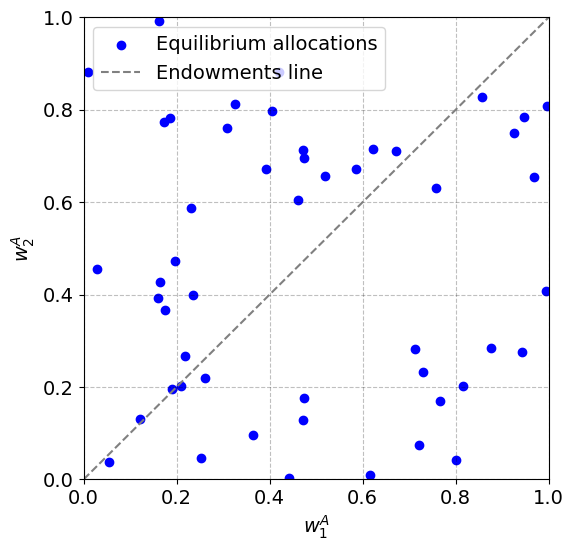

In [35]:
# generate W from Question 7 with same seed
np.random.seed(54)
N = 50
w_1A = np.random.uniform(0, 1, N)
w_2A = np.random.uniform(0, 1, N)

# combining into a set W
W = list(zip(w_1A, w_2A))

# estimate equilibrium allocations based on initial endowments
def estimate_equilibrium(w_1A, w_2A):
    return w_1A, w_2A

# estimate equilibrium allocations for all initial endowments in W
equilibrium_allocations = np.array([estimate_equilibrium(w[0], w[1]) for w in W])

# Visualizing the estimated equilibrium allocations in an Edgeworth Box
plt.figure(figsize=(6, 6))
plt.scatter(equilibrium_allocations[:, 0], equilibrium_allocations[:, 1], color='blue', label='Equilibrium allocations')
plt.xlabel('$w_1^A$')
plt.ylabel('$w_2^A$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axline((0, 0), (1, 1), color='grey', linestyle='--', label='Endowments line')
plt.legend()
plt.grid(True)
plt.show()